# Estimating the diffuse extragalactic neutrino flux 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=16)

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


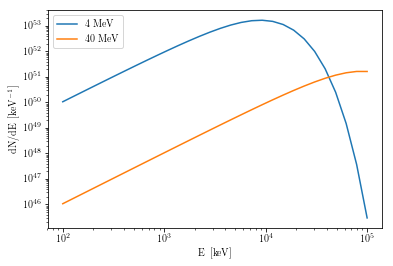

In [2]:
def dNdE(E, Etot, T):
    # E is the list of energies [keV]
    # T is the neutrino temperature [keV]
    # Etot is the total energy emitted in the CC supernova [kev]
    # dNdE in keV^-1
    dom = np.exp(E/T) + 1
    return Etot*120.*(E**2.)/7./(np.pi**4.)/(T**4.)/dom

Elist = np.logspace(2,5,30) # keV
T_ve = 4e3 # keV
Etot = 5e52 # ergs
Etot *= 6.242e+8 # ergs to keV
dNdE_ve3 = dNdE(Elist, Etot, T_ve)
dNdE_ve30 = dNdE(Elist, Etot, T_ve*10)

plt.figure(figsize=(6,4))
plt.loglog(Elist,dNdE_ve3, label=r"4 MeV")
plt.loglog(Elist,dNdE_ve30, label=r"40 MeV")
plt.ylabel(r"$\mathrm{dN/dE}~\, [\mathrm{keV}^{-1}]$")
plt.xlabel(r"$\mathrm{E}~\, [\mathrm{keV}]$")
plt.legend()
plt.savefig("../plots/dNdE.pdf", bbox_inches="tight")
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


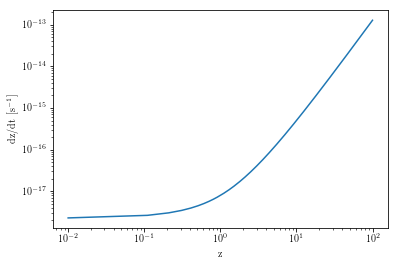

In [3]:
def dzdt(z, H0=70, omegaM=0.3, omegaA=0.7):
    # z is the redshift
    # H0 is the hubble constant [km s^-1 Mpc^-1]
    # OmegaM is the matter energy density
    # OmegaA is the cosmological constant energy density
    # dzdt in units s^-1
    H0 *= 3.24077929e-20 # convert H0 to s^-1 i.e. converting km to Mpc
    dzdt = H0*(1+z)*(omegaM*(1+z)**3 + omegaA)**0.5
    return dzdt
    
z = np.linspace(0.01,100,1000)
dzdt_t = dzdt(z)

plt.figure(figsize=(6,4))
plt.loglog(z,dzdt_t)
plt.ylabel(r"$\mathrm{dz/dt}~\, [\mathrm{s}^{-1}]$")
plt.xlabel(r"$\mathrm{z}$")
plt.savefig("../plots/dzdt.pdf", bbox_inches="tight")
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


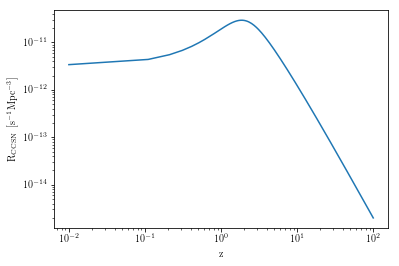

In [4]:
from scipy.interpolate import interp1d

def R_CCSN(z):
    # Output in s^-1 Mpc^-3
#     Z, R = np.loadtxt("../data/CCSupernova_rate.txt", unpack=True)
#     R *= 3.16887646e-8 # year^-1 to s^-1
#     Rate = interp1d(Z, R, bounds_error=False, fill_value = "extrapolate")
#     return Rate(z)
    R = 0.015*(1+z)**2.7/(1+((1+z)/2.9)**5.6)/143
    return R*3.16887646e-8 # year^-1 to s^-1

R = R_CCSN(z)
# R_analytic = 0.015*(1+z)**2.7/(1+((1+z)/2.9)**5.6)/143


plt.figure(figsize=(6,4))
plt.loglog(z,R)
# plt.loglog(z,R_analytic)
plt.ylabel(r"$\mathrm{R_{CCSN}}~\, [\mathrm{s}^{-1}\mathrm{Mpc}^{-3}]$")
plt.xlabel(r"$\mathrm{z}$")
plt.savefig("../plots/R.pdf", bbox_inches="tight")
plt.show()

In [5]:
from scipy.integrate import quad

def Nu_flux(E):
    # Output in keV^-1 s^-1 cm^-2
    def integrand(z):
        Eprime = E*(1+z)
        return R_CCSN(z)*dNdE(Eprime, Etot, T_ve)*(1+z)/np.abs(dzdt(z))
    
    Nuflux = quad(integrand,0,10)[0]
    c = 9.7155971e-15 # Mpc s^-1
    Nuflux *= 1.05026504e-49 # convert Mpc^-2 to cm^-2
    return Nuflux*c

Flux = np.zeros_like(Elist)
for i, E in enumerate(Elist):
    Flux[i] = Nu_flux(E)

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


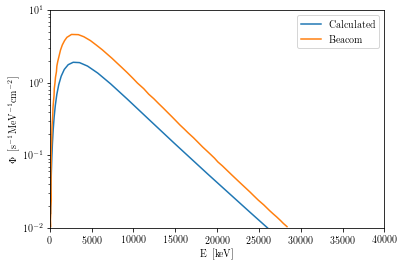

In [6]:
plt.figure(figsize=(6,4))
plt.semilogy(Elist,Flux*1e3, label=r"Calculated")
E_temp, Predicted_DSNB = np.loadtxt("../data/Predicted_DSNB.txt", unpack=True)
plt.semilogy(E_temp*1e3, Predicted_DSNB, label=r"Beacom")
plt.ylabel(r"$\Phi~\, [\mathrm{s}^{-1}\mathrm{MeV}^{-1}\mathrm{cm}^{-2}]$")
plt.xlabel(r"$\mathrm{E}~\, [\mathrm{keV}]$")
plt.xlim(0,40000)
plt.ylim(0.01,10)
plt.legend()
plt.savefig("../plots/Flux.pdf", bbox_inches="tight")
plt.show()

In [7]:
temp = interp1d(E_temp*1e3, Predicted_DSNB, bounds_error=False, fill_value = (0.0,0.0))
print("Total flux from DSNB =", quad(temp, 0, 1e7)[0], r"s^-1 cm^-2")

Total flux from DSNB = 32709.024719794295 s^-1 cm^-2


/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


## Now lets estimate if the flux from the galactic contribution of SN would be dominated by a single event

In [8]:
from random import *
from tqdm import tqdm
import scipy.interpolate as interpolate

In [9]:
def inverse_transform_sampling(function, x_range, nbins=100, n_samples=1000):
    bins = np.linspace(x_range[0], x_range[-1], num=nbins)
    pdf = function(np.delete(bins,-1) + np.diff(bins)/2)
    Norm = np.sum(pdf*np.diff(bins))
    pdf /= Norm
    cum_values = np.zeros(bins.shape)
    cum_values[1:] = np.cumsum(pdf*np.diff(bins))
    inv_cdf = interpolate.interp1d(cum_values, bins)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

In [10]:
R_E = 8.09 # kpc
Gal_R = (1/40)*0.85 # Events per year

def sample_SN(R, cartesian=False):
    phi = uniform(0,2*np.pi)
    costheta = uniform(-1,1)
#     u = random()
#     theta = np.arccos(costheta)
#     theta = np.pi/2.
#     r = R*u**(1./3.)
#     r = R*u**(1./2.)
#     r = uniform(0,R)
    #####################################################
    z = np.random.exponential(scale=0.33)
    
    l_c = 2.5 #kpc
    r_B = 2.0 #kpc
    sigma_0 = 611e6 #Msun/kpc^2

    def sigma_disc(r):
        return r*sigma_0*l_c*((r-r_B)**2 + l_c**2)**-0.5

    x_temp = np.linspace(0,R,num=100)
    r = inverse_transform_sampling(sigma_disc, x_temp, nbins=100, n_samples=1)
    theta = np.pi/2.
    #####################################################
    if cartesian:
        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
#         z = r * np.cos(theta)
        return x,y,z
    else:
        # This does not currently work, only use cartesian
        return theta, phi, r

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


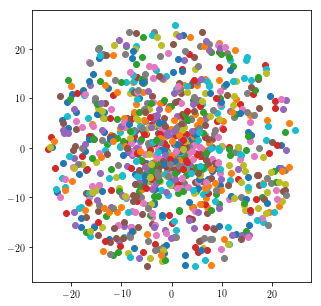

In [42]:
plt.figure(figsize=(5,5))
N = 1000
# r = np.zeros(N)

for i in range(N):
    x, y, z = sample_SN(25, cartesian=True)
#     theta, phi, r[i] = sample_SN(25, cartesian=False)
    plt.scatter(x,y)

plt.savefig("../plots/Scatter.pdf", bbox_inches="tight")
plt.show()

# plt.hist(r, bins=np.linspace(0,25,num=50))
# plt.show()

In [12]:
paleo_T1 = 1e5

def calc_dist(x, y, z):
    x_E = R_E
    y_E = 0.0
    z_E = 0.0
    return np.sqrt((x-x_E)**2+(y-y_E)**2+(z-z_E)**2)

N_SN = int(paleo_T1*Gal_R)
# print(N_SN)
L = 1e52 # ergs
Flux_SN = np.zeros(N_SN)

for i in tqdm(range(N_SN)):
    x, y, z = sample_SN(25, cartesian=True)
    r = calc_dist(x, y, z)
    Flux_SN[i] = L/4./np.pi/(r**2.) # ergs kpc^-2

100%|██████████| 2125/2125 [00:00<00:00, 4074.22it/s]


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


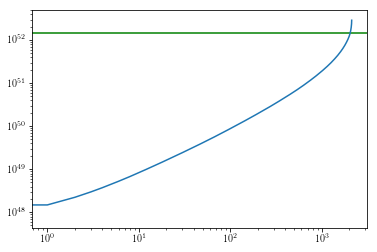

In [13]:
Flux_SN.sort()
Flux_cum = np.cumsum(Flux_SN)
plt.axhline(sum(Flux_SN)/2, color='g')
plt.semilogy(Flux_cum)
# plt.xlim(8500000,9000000)
# plt.ylim(1e53,2e53)
plt.xscale("log")
plt.show()

In [14]:
pecentile_50th = sum(Flux_SN)/2.

for i in range(Flux_SN.size):
    if Flux_cum[i] < pecentile_50th:
        continue
    else:
        index = i
        break
        
print("Total number of galactic SN", Flux_SN.size)
print("Number of SN contributing 50% of the flux =", Flux_SN.size-index)
print("Percentage of the total number =", (Flux_SN.size-index)*100/Flux_SN.size)

Total number of galactic SN 2125
Number of SN contributing 50% of the flux = 83
Percentage of the total number = 3.9058823529411764


In [15]:
N_MC = 100
N_contributing_CN = np.zeros([N_MC,2])
paleo_T = np.array([1e5,1e6]) # years

for k in range(paleo_T.size):
    N_SN = int(paleo_T[k]*Gal_R)
    for j in tqdm(range(N_MC)):
        Flux_SN = np.zeros(N_SN)
        for i in range(N_SN):
            x, y, z = sample_SN(25, cartesian=True)
            r = calc_dist(x, y, z)
            Flux_SN[i] = L/4./np.pi/(r**2.) # ergs kpc^-2

        Flux_SN.sort()
        Flux_cum = np.cumsum(Flux_SN)
        pecentile_50th = sum(Flux_SN)/2.
        for i in range(Flux_SN.size):
            if Flux_cum[i] < pecentile_50th:
                continue
            else:
                index = i
                break

        N_contributing_CN[j,k] = Flux_SN.size-index

100%|██████████| 100/100 [07:19<00:00,  4.39s/it]


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


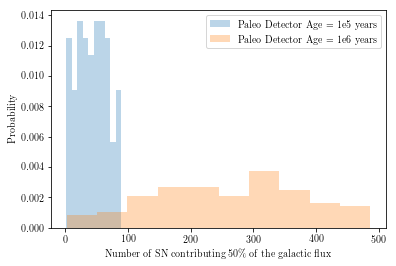

In [16]:
plt.hist(N_contributing_CN[:,0], alpha=0.3, normed=True, label="Paleo Detector Age = 1e5 years")
plt.hist(N_contributing_CN[:,1], alpha=0.3, normed=True, label="Paleo Detector Age = 1e6 years")
plt.legend()
plt.xlabel(r"Number of SN contributing 50\% of the galactic flux")
plt.ylabel("Probability")
plt.savefig("../plots/GalacticSN_MC.pdf", bbox_inches="tight")
plt.show()

## Now lets make the MC plot of number of supernovae per distance bin

In [17]:
paleo_T = np.array([1e5,1e6]) # years
dist_SN_0 = np.zeros(int(paleo_T[0]*Gal_R))
dist_SN_1 = np.zeros(int(paleo_T[1]*Gal_R))
N_MC = 1

# paleo_T = 1e7

# for j in tqdm(range(N_MC)):
for j in tqdm(range(2)):
    N_SN = int(paleo_T[j]*Gal_R)
    for i in range(N_SN):
        x, y, z = sample_SN(25, cartesian=True)
        if j == 0:
            dist_SN_0[i] = calc_dist(x, y, z)
        if j == 1:
            dist_SN_1[i] = calc_dist(x, y, z)

100%|██████████| 2/2 [00:04<00:00,  2.45s/it]


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to Dej

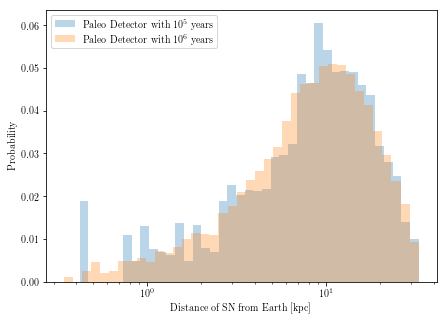

In [18]:
plt.figure(figsize=(7,5))
plt.hist(dist_SN_0, bins=np.logspace(np.log10(dist_SN_0.min()),np.log10(dist_SN_0.max()), 40),
         alpha=0.3, label="Paleo Detector with $10^5$ years", normed=True)
plt.hist(dist_SN_1, bins=np.logspace(np.log10(dist_SN_1.min()),np.log10(dist_SN_1.max()), 40),
         alpha=0.3, label="Paleo Detector with $10^6$ years", normed=True)
plt.legend()
plt.xlabel(r"Distance of SN from Earth [kpc]")
plt.ylabel("Probability ")
plt.xscale("log")
plt.savefig("../plots/SN_distance_hist.pdf", bbox_inches="tight")
# plt.xlim(0.1,dist_SN.max())
plt.show()

In [19]:
print(dist_SN_0,dist_SN_1)

[ 5.35278811 18.47087758 18.4982731  ...  5.4824639  15.71611282
 10.59462549] [18.1710724  12.53756569 11.11700445 ... 19.38535898 12.76228696
  9.13093312]


In [20]:
paleo_T = 1e9 # years
dist_SN = np.zeros(int(paleo_T*Gal_R))
N_SN = int(paleo_T*Gal_R)

for i in tqdm(range(N_SN)):
    x, y, z = sample_SN(25, cartesian=True)
    dist_SN[i] = calc_dist(x, y, z)

100%|██████████| 21250000/21250000 [1:25:44<00:00, 4130.41it/s]


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


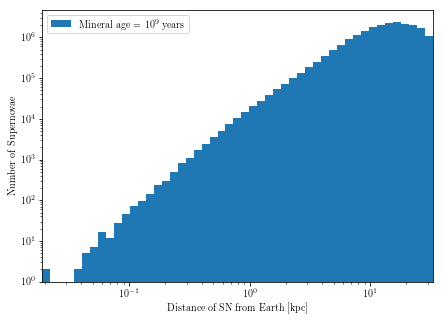

In [31]:
plt.figure(figsize=(7,5))
plt.hist(dist_SN, bins=np.logspace(np.log10(dist_SN.min()),np.log10(dist_SN.max()), 50),
        label="Mineral age = $10^9$ years")
plt.legend()

plt.xlabel(r"Distance of SN from Earth [kpc]")
plt.ylabel("Number of Supernovae")
plt.xscale("log")
plt.xlim(dist_SN.min(),dist_SN.max())
plt.yscale("log")

plt.savefig("../plots/SN_distance_hist.pdf", bbox_inches="tight")
plt.show()

In [28]:
print(dist_SN.min())

0.018988273167337692


### Now we want to plot the spectra of DSNB, Galactic SN, and a single close SN

We will calculate them one by one, starting with the DSNB as above

In [32]:
Flux_DSNB = np.zeros_like(Elist)
for i, E in enumerate(Elist):
    Flux_DSNB[i] = Nu_flux(E)

Flux_DSNB *= 6. # To account for the fact that there are 6 neutrino species
Flux_DSNB *= 7.0e-38/6.6551079e-26 # neutrino_interaction_strength/nucleon_mass
Flux_DSNB *= 3.154e+7*1e9 # s^-1 to Gyr^-1

Now for the galactic SN

In [33]:
T_ve = 4e3 # keV
Etot = 5e52 # ergs
Etot *= 6.242e+8 # ergs to keV
dNdE_ve_SN = dNdE(Elist, Etot, T_ve)
dNdE_ve_Galactic = np.zeros_like(dNdE_ve_SN)

for i in tqdm(range(dist_SN.size)):
    dNdE_ve_Galactic += dNdE_ve_SN/4./np.pi/((dist_SN[i]*3.086e+21)**2.)

100%|██████████| 21250000/21250000 [02:05<00:00, 168880.61it/s]


In [34]:
# dNdE_ve_Galactic is now in kev^-1 cm^-2
dNdE_ve_Galactic *= 6.
dNdE_ve_Galactic *= 7.0e-38/6.6551079e-26 # neutrino_interaction_strength/nucleon_mass
# dNdE_ve_Galactic is now in kev^-1 kg^-1

And finally a single SN at 10pc

In [35]:
dNdE_ve_singleSN = dNdE_ve_SN/4./np.pi/((0.01*3.086e+21)**2.) # SN at 10 pc
dNdE_ve_singleSN *= 6.
dNdE_ve_singleSN *= 7.0e-38/6.6551079e-26 # neutrino_interaction_strength/nucleon_mass

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


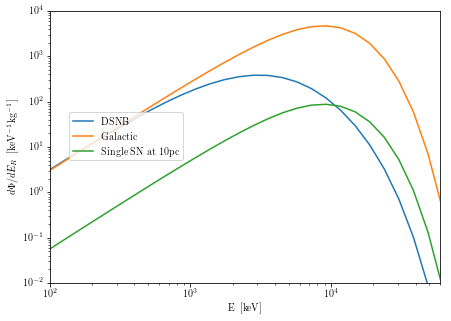

In [38]:
plt.figure(figsize=(7,5))
plt.semilogy(Elist, Flux_DSNB, label=r"DSNB")
plt.semilogy(Elist, dNdE_ve_Galactic, label=r"Galactic")
plt.semilogy(Elist, dNdE_ve_singleSN, label=r"Single SN at 10pc")
plt.ylabel(r"$d\Phi/dE_R~\, [\mathrm{keV}^{-1}\mathrm{kg}^{-1}]$")
plt.xlabel(r"$\mathrm{E}~\, [\mathrm{keV}]$")
plt.xlim(100,60000)
plt.xscale("log")
plt.ylim(1e-2,1e4)
plt.legend(loc=(0.05,0.45))
plt.savefig("../plots/Spectra.pdf", bbox_inches="tight")
plt.show()